# 데이터 전처리 방법 실습

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

## 데이터셋 로딩 및 df 만들기

In [3]:
df = pd.read_csv("./datas_ml/Data.csv")

In [4]:
# 온라인 소핑목 고객 데이터라고 가정, 이 소핑목에서 물건을 구매했으면, Purchased 가 yes
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [5]:
# 이 데이터를 가지고 인공지능 만들건데, 고객 데이터를 넣으면, 우리 쇼핑몰에서 물건을 구매할것 같은지 할거 같은지
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [6]:
sorted(df['Country'].unique())

['France', 'Germany', 'Spain']

In [7]:
# sorted(df['Purchased'].unique())
sorted(df['Purchased'].unique())

['No', 'Yes']

## 결측치(NaN) 처리

In [8]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [9]:
df.isna().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

### 1. nan을 삭제하는 전략

In [10]:
df.dropna()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 2. 채우는 전략

In [85]:
df.fillna(0)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,0.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,0.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [12]:
# 평균으로 채우는 전략
df['Age'].mean()
df['Salary'].mean()

np.float64(63777.77777777778)

In [13]:
df.fillna(df.mean(numeric_only=True))

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [15]:
# 우리는 dropna() 선택
df = df.dropna()
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [16]:
y=df['Purchased']
y

0     No
1    Yes
2     No
3     No
5    Yes
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

## x, y 데이터를 분리

In [17]:
# x, y 데이터를 분리
# X : 독립변수, 설명변수 (feature)
# Y : 종속변수, 목표변수 (target, label)
X = df.loc[:, 'Country':'Salary']  # 맨 마지막 칼럼 제외한 나머지 칼럼들
X


,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
5,France,35.0,58000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [18]:
df['Country'].value_counts()

Country
France     4
Spain      2
Germany    2
Name: count, dtype: int64

# 레이블 인코딩, One Hot 인코딩
- 범주형(문자) 데이터를 -> 숫자로 변환
- 레이블 인코딩: 문자열 -> 0,1 ,2 ...

## 레이블 인코딩하는 방법

In [19]:
# 숫자 변환을 위한 라이브러리 로딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [20]:
# 객체 생성
encoder = LabelEncoder()

In [21]:
X['Country']

0     France
1      Spain
2    Germany
3      Spain
5     France
7     France
8    Germany
9     France
Name: Country, dtype: object

In [22]:
X['Country'] = encoder.fit_transform(X['Country'])

In [23]:
X

,Country,Age,Salary
0,0,44.0,72000.0
1,2,27.0,48000.0
2,1,30.0,54000.0
3,2,38.0,61000.0
5,0,35.0,58000.0
7,0,48.0,79000.0
8,1,50.0,83000.0
9,0,37.0,67000.0


## 원핫인코딩 방법

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
# 객체 생성
# ct = ColumnTransformer([('encoder', OneHotEncoder(), [칼럼인덱스1, 칼럼인덱스2])])
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])])

In [26]:
X['Country']

0    0
1    2
2    1
3    2
5    0
7    0
8    1
9    0
Name: Country, dtype: int64

In [27]:
# 변환(원핫인코딩으로)
ct.fit_transform(X)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [28]:
# France, Germany, Spain
# [1.,    0.,     0.]  
# [0.,    0.,     1.]
# [0.,    1.,     0.]
# [0.,    0.,     1.]
# [1.,    0.,     0.]
# [1.,    0.,     0.]
# [0.,    1.,     0.]
# [1.,    0.,     0.]

In [29]:
X.head()

,Country,Age,Salary
0,0,44.0,72000.0
1,2,27.0,48000.0
2,1,30.0,54000.0
3,2,38.0,61000.0
5,0,35.0,58000.0


In [30]:
# 머신러닝을 위한 one-hot 인코딩 전체 코드
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

### 데이터를 확인했으면, 컴퓨터가 이해할 수 있도록 바꿔야 한다.
- 컴퓨터는 숫자로 처리한다. 숫자가 아닌 데이터 중에서, 카테고리로 판단되는 데이터는, 숫자로 바꿔줄 수 있다.

## 카테고리컬(Categorical) 문자 데이터 처리 방법
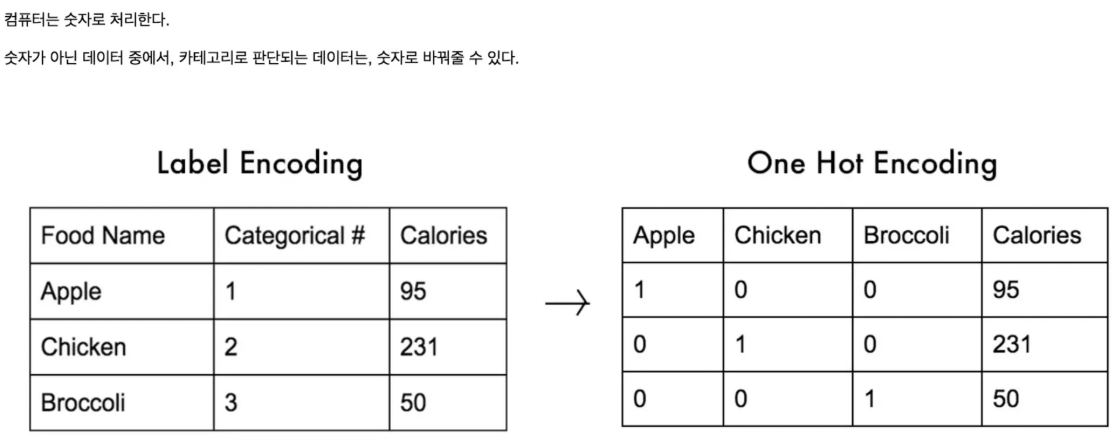

In [42]:
# 문자열 데이터를 확인한다 => 문자를 숫자로 바꿔줘야 함
# 1. 문자열 컬럼의 데이터가 몇개인지, 유니크한 갯수를 센다.
# 2. 갯수가 3개 이상이면 원핫인코딩을 해야학습이 잘 됨

## y 데이터 인코딩

In [43]:
y.value_counts()

Purchased
No     4
Yes    4
Name: count, dtype: int64

In [44]:
y.map({'No':0, 'Yes':1})
y

0     No
1    Yes
2     No
3     No
5    Yes
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object

In [45]:
X[:5]

array([[1.0e+00, 0.0e+00, 0.0e+00, 4.4e+01, 7.2e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.7e+01, 4.8e+04],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.0e+01, 5.4e+04],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.8e+01, 6.1e+04],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.5e+01, 5.8e+04]])

In [46]:
# x, y 인코딩이 끝났으면, Feature Scaling (특성 스케일링) 작업을 해야함

# 피처스케일링

- 서로 다른 단위를 '같은 기준'으로 맞춰주기 위해
- 유클리디언 디스턴스로 오차를 줄여 나가는데, 하나의 변수는 오차가 크고, 하나의 변수는 오차가 작으면, 나중에 오차를 수정할때 편중되게 된다.
- 따라서 값의 레인지를 맞춰줘야 정확히 트레이닝 된다.
### Age 와 Salary 는 같은 스케일이 아니다.
- Age 는 27 ~ 50
- Salary 는 40k ~ 90k

### Feature Scaling 중 가장 많이 쓰는 방법
- 표준화(Standardisation) : 평균을 기준으로 얼마나 떨어져 있느냐? 같은 기준으로 만드는 방법, 음수도 존재, 데이터의 최대최소값 모를때 사용.
- 정규화(Normalisation) : 0 ~ 1 사이로 맞추는 것. 데이터의 위치 비교가 가능, 데이터의 최대최소값 알떄 사용
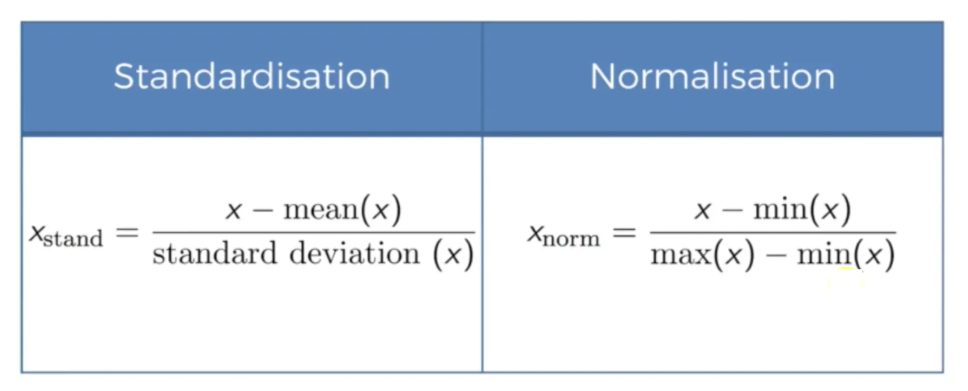

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
# 표준화(평균 0, 표준편차 1인 정규분포를 따르는 범위 데이터로 변환)
# 객체 생성
scaler = StandardScaler()

#  변환
X_scaled = scaler.fit_transform(X)

In [49]:
# 정규화 (0~1 사이의 값으로 변환)
# scaler = MinMaxScaler()
# scaler.fit_transform(X)

In [50]:
# 데이터 전처리할 것들
# 1. 결측치 처리
# 2. X, y 데이터 분리 : 
# 3. X, y 인코딩 (문자 -> 숫자) : ML은 숫자를 입력가능
# 4. Feature Scaling (특성 스케일링) (표준화 or 정규화): 데이터의 수준을 맞추기 위함, X(독립변수)만 함.

 # train test 데이터 분할하기

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_scaled

array([[ 1.        , -0.57735027, -0.57735027,  0.69985807,  0.58989097],
       [-1.        , -0.57735027,  1.73205081, -1.51364653, -1.50749915],
       [-1.        ,  1.73205081, -0.57735027, -1.12302807, -0.98315162],
       [-1.        , -0.57735027,  1.73205081, -0.08137885, -0.37141284],
       [ 1.        , -0.57735027, -0.57735027, -0.47199731, -0.6335866 ],
       [ 1.        , -0.57735027, -0.57735027,  1.22068269,  1.20162976],
       [-1.        ,  1.73205081, -0.57735027,  1.48109499,  1.55119478],
       [ 1.        , -0.57735027, -0.57735027, -0.211585  ,  0.1529347 ]])

In [53]:
train_test_split(X_scaled, y, test_size=0.2, random_state=42)  

[array([[ 1.        , -0.57735027, -0.57735027,  0.69985807,  0.58989097],
        [ 1.        , -0.57735027, -0.57735027, -0.211585  ,  0.1529347 ],
        [-1.        ,  1.73205081, -0.57735027, -1.12302807, -0.98315162],
        [ 1.        , -0.57735027, -0.57735027, -0.47199731, -0.6335866 ],
        [-1.        , -0.57735027,  1.73205081, -0.08137885, -0.37141284],
        [-1.        ,  1.73205081, -0.57735027,  1.48109499,  1.55119478]]),
 array([[-1.        , -0.57735027,  1.73205081, -1.51364653, -1.50749915],
        [ 1.        , -0.57735027, -0.57735027,  1.22068269,  1.20162976]]),
 0     No
 9    Yes
 2     No
 5    Yes
 3     No
 8     No
 Name: Purchased, dtype: object,
 1    Yes
 7    Yes
 Name: Purchased, dtype: object]

# 자동차 판매 예측

In [55]:
df = pd.read_csv('datas_ml/cars.csv')
df

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType,Price
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer,580
1,Mercedes,E-Class,2014.0,168229.0,4.802429,Gasoline,White,Seoul,NaN,Dealer,1835
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer,2226
3,Kia,Sorento,2009.0,89045.0,3.527349,Gasoline,NaN,Daegu,minor scratch on bumper,Dealer,1050
4,Ford,Escape,2005.0,34698.0,2.793782,Hybrid,Black,Seoul,NaN,Private,1290
...,...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private,1166
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer,1045
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer,1265
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer,1947


In [56]:
df.shape

(300, 11)

In [57]:
df.isna().sum()

Brand             0
Model             0
Year             15
Mileage          20
EngineSize        0
FuelType          0
Color            10
Region            8
ConditionDesc    25
SellerType        0
Price             0
dtype: int64

In [58]:
df_clean = df.dropna().copy()
df_clean

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType,Price
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer,580
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer,2226
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,regular maintenance done,Private,2058
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,dashboard damage,Private,1371
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,noise in suspension,Private,2342
...,...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private,1166
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer,1045
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer,1265
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer,1947


In [59]:
df_clean.shape

(227, 11)

In [71]:
#  y
y = df_clean['Price']
y

0       580
2      2226
6      2058
8      1371
9      2342
       ... 
295    1166
296    1045
297    1265
298    1947
299    1489
Name: Price, Length: 227, dtype: int64

In [61]:
X = df_clean.drop('Price', axis=1)
X

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,ConditionDesc,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,like new,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,engine issue,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,regular maintenance done,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,dashboard damage,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,noise in suspension,Private
...,...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,slight dent,Private
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,needs painting,Dealer
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,no major problems,Dealer
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,no major problems,Dealer


# 문자열 데이터 처리

In [64]:
# 컬럼 삭제
X = X.drop('ConditionDesc', axis=1)
X

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,Private
...,...,...,...,...,...,...,...,...,...
295,Ford,Focus,2017.0,178352.0,2.289415,Diesel,Black,Daegu,Private
296,Kia,Sorento,2005.0,79459.0,4.239498,Hybrid,Black,Busan,Dealer
297,Hyundai,Tucson,2018.0,195004.0,2.018563,Gasoline,Gray,Seoul,Dealer
298,Mercedes,C-Class,2021.0,200968.0,3.726011,Gasoline,Black,Busan,Dealer


In [65]:
# X 문자열 컬럼 2개인지, 3개 이상인지 확인
X['Brand'].nunique()

5

In [66]:
X['Model'].nunique()

20

In [67]:
X['FuelType'].nunique()

4

In [68]:
X['Color'].nunique()

6

In [69]:
X['Region'].nunique()

5

In [70]:
X['SellerType'].nunique()

2

- 컬럼 범주 데이터에서 범주의 갯수가 많을 경우
- 컬럼 30개 있는데, 메모리 좀 더 큰것을 해야할 것 같다.
## 인코딩할 칼럼 구분
- 레이블 인코딩 할 칼럼
- 원한 인코딩할 칼럼
- 숫자 데이터 -> 피처스케일링 해야함

In [72]:
X.head()

,Brand,Model,Year,Mileage,EngineSize,FuelType,Color,Region,SellerType
0,Ford,Escape,2001.0,287486.0,4.800248,Diesel,Black,Daejeon,Dealer
2,Mercedes,E-Class,2023.0,106081.0,3.293752,Gasoline,Red,Incheon,Dealer
6,Ford,Explorer,2023.0,22671.0,2.314658,EV,Black,Daegu,Private
8,Mercedes,E-Class,2001.0,51663.0,4.009498,Diesel,Gray,Daejeon,Private
9,BMW,X5,2020.0,15708.0,4.166316,Hybrid,Black,Busan,Private


## 현업방법 - 데이터 전처리

In [73]:
X.columns

Index(['Brand', 'Model', 'Year', 'Mileage', 'EngineSize', 'FuelType', 'Color',
       'Region', 'SellerType'],
      dtype='object')

In [74]:
label_cols = ['SellerType']
onehot_cols = ['Brand', 'Model', 'FuelType', 'Color', 'Region']
numeric_cols = ['Year', 'Mileage', 'EngineSize']

In [75]:
from sklearn.preprocessing import OrdinalEncoder

In [76]:
ct = ColumnTransformer([('label', OrdinalEncoder(), label_cols),
                       ('onehot', OneHotEncoder(), onehot_cols),
                       ('scaler', StandardScaler(), numeric_cols) ])

In [77]:
ct

,transformers,"[('label', ...), ('onehot', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'


In [78]:
# sparse matrix로 표현
print(ct.fit_transform(X))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1917 stored elements and shape (227, 44)>
  Coords	Values
  (0, 2)	1.0
  (0, 11)	1.0
  (0, 26)	1.0
  (0, 30)	1.0
  (0, 38)	1.0
  (0, 41)	-0.9249768106545554
  (0, 42)	1.7880660195193743
  (0, 43)	1.5429197838977786
  (1, 5)	1.0
  (1, 10)	1.0
  (1, 28)	1.0
  (1, 33)	1.0
  (1, 39)	1.0
  (1, 41)	1.4354392304332764
  (1, 42)	-0.3546402183717234
  (1, 43)	0.2937526938363846
  (2, 0)	1.0
  (2, 2)	1.0
  (2, 12)	1.0
  (2, 27)	1.0
  (2, 30)	1.0
  (2, 37)	1.0
  (2, 41)	1.4354392304332764
  (2, 42)	-1.3398563221312474
  (2, 43)	-0.5180987553925732
  :	:
  (224, 3)	1.0
  (224, 23)	1.0
  (224, 28)	1.0
  (224, 32)	1.0
  (224, 40)	1.0
  (224, 41)	0.8989810392769509
  (224, 42)	0.6956939333439961
  (224, 43)	-0.7636173326615148
  (225, 5)	1.0
  (225, 9)	1.0
  (225, 28)	1.0
  (225, 30)	1.0
  (225, 36)	1.0
  (225, 41)	1.2208559539707462
  (225, 42)	0.7661390699321965
  (225, 43)	0.6521764959891053
  (226, 0)	1.0
  (226, 2)	1.0
  (226, 11)	1.0

- 이후 ml 학습